In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   id                                                        1000 non-null   int64 
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose of the credit                                     1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Status of savings account/bonds                           1000 non-null   object
 6   Present employment(years)                                 1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   personal_status              

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [7]:
df["Purpose of the credit"] = encoder.fit_transform(df["Purpose of the credit"])

In [8]:
df["Credit amount"] = encoder.fit_transform(df["Credit amount"])

In [9]:
df["Status of savings account/bonds"] = encoder.fit_transform(
    df["Status of savings account/bonds"]
)

In [10]:
df["Present employment(years)"] = encoder.fit_transform(df["Present employment(years)"])

In [11]:
df["personal_status"] = encoder.fit_transform(df["personal_status"])

In [12]:
df["Other debtors / guarantors"] = encoder.fit_transform(
    df["Other debtors / guarantors"]
)

In [13]:
df["Property"] = encoder.fit_transform(df["Property"])

In [14]:
df["Other installment plans (banks/stores)"] = encoder.fit_transform(
    df["Other installment plans (banks/stores)"]
)

In [15]:
df["Housing"] = encoder.fit_transform(df["Housing"])

In [16]:
df["Job"] = encoder.fit_transform(df["Job"])

In [17]:
df["Telephone"] = encoder.fit_transform(df["Telephone"])

In [18]:
df["Foreign worker"] = encoder.fit_transform(df["Foreign worker"])

In [19]:
df["Status of existing checking account"] = encoder.fit_transform(
    df["Status of existing checking account"]
)

In [20]:
df["Credit history"] = encoder.fit_transform(df["Credit history"])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   id                                                        1000 non-null   int64
 1   Duration in months                                        1000 non-null   int64
 2   Credit history                                            1000 non-null   int32
 3   Purpose of the credit                                     1000 non-null   int32
 4   Credit amount                                             1000 non-null   int64
 5   Status of savings account/bonds                           1000 non-null   int32
 6   Present employment(years)                                 1000 non-null   int32
 7   Installment rate in percentage of disposable income       1000 non-null   int64
 8   personal_status                        

In [22]:
df.describe()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.903000,2.219000,4.484000,447.940000,2.1450,1.525000,2.973000,1.878000,1.866000,...,1.386000,35.546000,0.908000,1.071000,1.407000,1.274000,1.155000,0.404000,0.963000,0.700000
std,288.819436,12.058814,1.064035,2.421075,264.627368,1.1114,1.344315,1.118715,1.350904,0.445244,...,1.210979,11.375469,0.421561,0.531264,0.577654,0.946478,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,250.750000,12.000000,1.000000,3.000000,218.750000,2.0000,0.000000,2.000000,0.000000,2.000000,...,0.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,500.500000,18.000000,3.000000,4.000000,439.500000,2.0000,1.000000,3.000000,3.000000,2.000000,...,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,750.250000,24.000000,3.000000,6.000000,676.250000,2.0000,3.000000,4.000000,3.000000,2.000000,...,3.000000,42.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1000.000000,72.000000,4.000000,9.000000,920.000000,4.0000,4.000000,4.000000,3.000000,2.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_data = scaler.fit_transform(df)

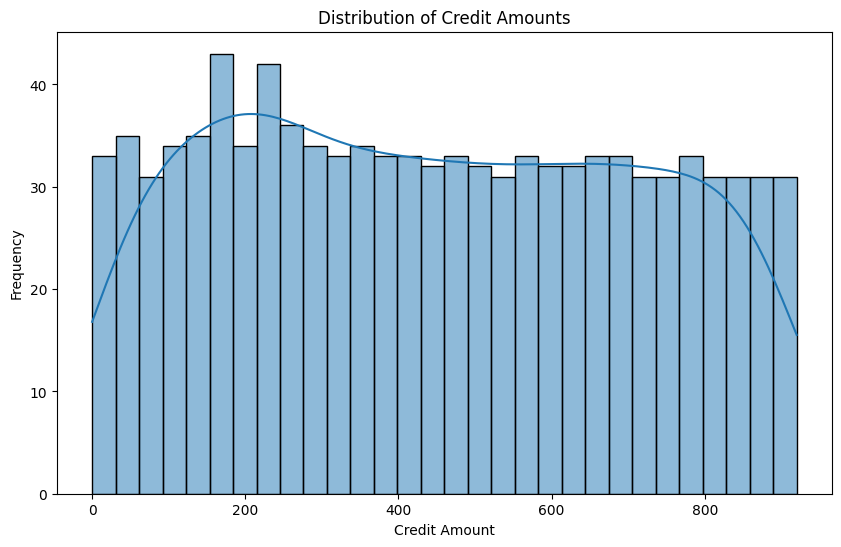

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Credit amount"], bins=30, kde=True)
plt.title("Distribution of Credit Amounts")
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = df.drop(
    "Status of existing checking account", axis=1
)  # Assuming 'id' is not a useful feature
y = df[
    "Status of existing checking account"
]  # Assuming 'Credit amount' is the target variable


# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Initialize and train the Random Forest Classifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


# Make predictions on the test set

y_pred = model.predict(X_test)


# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)


# class_report = classification_report(y_test, y_pred)

accuracy

0.76

In [26]:
from xgboost import XGBClassifier

In [27]:
model2 = XGBClassifier()

In [28]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred2 = model2.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred2)

In [31]:
accuracy

0.775

In [ ]:
import joblib

# Save the Random Forest model
joblib.dump(model, "random_forest_model.pkl")

# Save the XGBoost model
joblib.dump(model2, "xgboost_model.pkl")

['xgboost_model.pkl']